[View in Colaboratory](https://colab.research.google.com/github/Shrey09/Machine-Learning-/blob/master/CIFAR10_CNN.ipynb)

In [134]:
!pip install pydrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd

from keras.datasets import mnist,cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Activation,Dense,Dropout,Flatten
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from sklearn.metrics import confusion_matrix

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [139]:
print("X_train Shape: ",x_train.shape)
print("Y_train Shape: ",y_train.shape)
print("X_test Shape: ",x_test.shape)
print("Y_test Shape: ",y_test.shape)

X_train Shape:  (50000, 32, 32, 3)
Y_train Shape:  (50000, 1)
X_test Shape:  (10000, 32, 32, 3)
Y_test Shape:  (10000, 1)


[6]
[9]
[9]
[4]
[1]


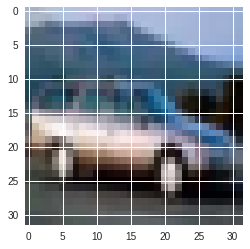

In [140]:
for i in range(5):
  data = plt.imshow(x_train[i,:,:,:])
  print(y_train[i,:])

In [0]:
#Normalize the data

x_train = x_train / 255.0
x_test = x_test / 255.0

[6]
[9]
[9]
[4]
[1]


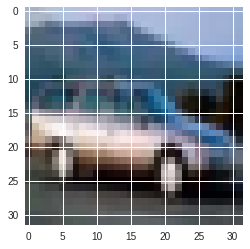

In [142]:
for i in range(5):
  data = plt.imshow(x_train[i,:,:,:])
  print(y_train[i,:])

**Encode label**

In [0]:
y_train = to_categorical(y_train, num_classes = 10)
y_test =  to_categorical(y_test, num_classes = 10)
input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


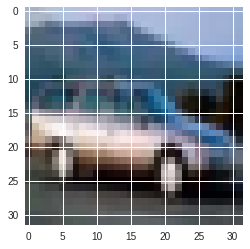

In [144]:
for i in range(5):
  data = plt.imshow(x_train[i,:,:,:])
  print(y_train[i,:])

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = input_shape,))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation = "softmax"))

In [146]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_65 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
batch_normalization_66 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 64)        18496     
__________

In [0]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
epochs = 60
batch_size = 64

In [0]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(x_train)

In [151]:
history = model.fit(x_train,y_train,
                              epochs = epochs, 
                              validation_data = (x_test,y_test),
                              batch_size=batch_size,
                              callbacks=[learning_rate_reduction])

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
43968/50000 [=========================>....] - ETA: 8s - loss: 2.0738 - acc: 0.2218

50000/50000 [==============================] - 72s 1ms/step - loss: 2.0463 - acc: 0.2293 - val_loss: 1.7327 - val_acc: 0.3290
Epoch 2/60
26624/50000 [==============>...............] - ETA: 21s - loss: 1.7723 - acc: 0.3208

50000/50000 [==============================] - 48s 959us/step - loss: 1.7305 - acc: 0.3384 - val_loss: 1.8276 - val_acc: 0.3103
Epoch 3/60
19840/50000 [==========>...................] - ETA: 27s - loss: 1.5982 - acc: 0.3987

50000/50000 [==============================] - 48s 964us/step - loss: 1.5572 - acc: 0.4137 - val_loss: 1.6803 - val_acc: 0.4420
Epoch 4/60
17280/50000 [=========>....................] - ETA: 29s - loss: 1.4603 - acc: 0.4602

50000/50000 [==============================] - 48s 965us/step - loss: 1.4046 - acc: 0.4913 - val_loss: 1.2235 - val_acc: 0.5672
Epoch 5/60
16320/50000 [========>.....................] - ETA: 30s - loss: 1.3133 - acc: 0.5368

50000/50000 [==============================] - 48s 954us/step - loss: 1.2732 - acc: 0.5567 - val_loss: 1.0565 - val_acc: 0.6114
Epoch 6/60
16000/50000 [========>.....................] - ETA: 30s - loss: 1.1960 - acc: 0.5934

50000/50000 [==============================] - 48s 959us/step - loss: 1.1711 - acc: 0.6029 - val_loss: 1.1179 - val_acc: 0.6181
Epoch 7/60
15872/50000 [========>.....................] - ETA: 30s - loss: 1.1079 - acc: 0.6266

50000/50000 [==============================] - 48s 961us/step - loss: 1.0880 - acc: 0.6367 - val_loss: 1.0702 - val_acc: 0.6321
Epoch 8/60
15808/50000 [========>.....................] - ETA: 31s - loss: 1.0430 - acc: 0.6510

50000/50000 [==============================] - 48s 961us/step - loss: 1.0276 - acc: 0.6612 - val_loss: 0.8873 - val_acc: 0.6997
Epoch 9/60
15808/50000 [========>.....................] - ETA: 30s - loss: 0.9869 - acc: 0.6778

50000/50000 [==============================] - 48s 958us/step - loss: 0.9834 - acc: 0.6793 - val_loss: 0.8345 - val_acc: 0.7232
Epoch 10/60
15680/50000 [========>.....................] - ETA: 30s - loss: 0.9410 - acc: 0.6913

50000/50000 [==============================] - 48s 956us/step - loss: 0.9397 - acc: 0.6947 - val_loss: 0.8512 - val_acc: 0.7174
Epoch 11/60
15680/50000 [========>.....................] - ETA: 31s - loss: 0.9010 - acc: 0.7097

50000/50000 [==============================] - 48s 960us/step - loss: 0.8914 - acc: 0.7143 - val_loss: 0.7027 - val_acc: 0.7710
Epoch 12/60
15680/50000 [========>.....................] - ETA: 31s - loss: 0.8442 - acc: 0.7352

50000/50000 [==============================] - 48s 958us/step - loss: 0.8585 - acc: 0.7266 - val_loss: 0.9596 - val_acc: 0.6879
Epoch 13/60
15680/50000 [========>.....................] - ETA: 31s - loss: 0.8307 - acc: 0.7350

50000/50000 [==============================] - 48s 958us/step - loss: 0.8374 - acc: 0.7361 - val_loss: 0.7493 - val_acc: 0.7437
Epoch 14/60
15680/50000 [========>.....................] - ETA: 31s - loss: 0.8095 - acc: 0.7437

50000/50000 [==============================] - 48s 960us/step - loss: 0.8018 - acc: 0.7452 - val_loss: 0.6801 - val_acc: 0.7811
Epoch 15/60
15680/50000 [========>.....................] - ETA: 31s - loss: 0.7681 - acc: 0.7579

50000/50000 [==============================] - 48s 962us/step - loss: 0.7867 - acc: 0.7526 - val_loss: 0.7074 - val_acc: 0.7669
Epoch 16/60
15680/50000 [========>.....................] - ETA: 31s - loss: 0.7723 - acc: 0.7598

50000/50000 [==============================] - 48s 958us/step - loss: 0.7603 - acc: 0.7612 - val_loss: 0.7101 - val_acc: 0.7701
Epoch 17/60
15680/50000 [========>.....................] - ETA: 31s - loss: 0.7143 - acc: 0.7761

50000/50000 [==============================] - 48s 962us/step - loss: 0.7433 - acc: 0.7654 - val_loss: 0.7004 - val_acc: 0.7802

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 18/60
11520/50000 [=====>........................] - ETA: 34s - loss: 0.7017 - acc: 0.7777

50000/50000 [==============================] - 48s 956us/step - loss: 0.6812 - acc: 0.7871 - val_loss: 0.5691 - val_acc: 0.8148
Epoch 19/60
14080/50000 [=======>......................] - ETA: 32s - loss: 0.6719 - acc: 0.7940

50000/50000 [==============================] - 48s 958us/step - loss: 0.6614 - acc: 0.7924 - val_loss: 0.5911 - val_acc: 0.8098
Epoch 20/60
15040/50000 [========>.....................] - ETA: 31s - loss: 0.6265 - acc: 0.8041

50000/50000 [==============================] - 48s 957us/step - loss: 0.6429 - acc: 0.7998 - val_loss: 0.6129 - val_acc: 0.8099
Epoch 21/60
15424/50000 [========>.....................] - ETA: 31s - loss: 0.6366 - acc: 0.7996

50000/50000 [==============================] - 48s 957us/step - loss: 0.6232 - acc: 0.8041 - val_loss: 0.6444 - val_acc: 0.7977

Epoch 00021: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 22/60
11456/50000 [=====>........................] - ETA: 34s - loss: 0.5977 - acc: 0.8100

50000/50000 [==============================] - 48s 957us/step - loss: 0.5955 - acc: 0.8132 - val_loss: 0.5627 - val_acc: 0.8228
Epoch 23/60
14080/50000 [=======>......................] - ETA: 32s - loss: 0.5733 - acc: 0.8180

50000/50000 [==============================] - 48s 960us/step - loss: 0.5752 - acc: 0.8179 - val_loss: 0.5231 - val_acc: 0.8356
Epoch 24/60
15040/50000 [========>.....................] - ETA: 31s - loss: 0.5692 - acc: 0.8201

50000/50000 [==============================] - 48s 955us/step - loss: 0.5692 - acc: 0.8211 - val_loss: 0.5411 - val_acc: 0.8271
Epoch 25/60
15424/50000 [========>.....................] - ETA: 31s - loss: 0.5685 - acc: 0.8229

50000/50000 [==============================] - 48s 958us/step - loss: 0.5672 - acc: 0.8208 - val_loss: 0.5389 - val_acc: 0.8292
Epoch 26/60
15552/50000 [========>.....................] - ETA: 31s - loss: 0.5508 - acc: 0.8254

50000/50000 [==============================] - 48s 962us/step - loss: 0.5545 - acc: 0.8270 - val_loss: 0.5374 - val_acc: 0.8335

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 27/60
11456/50000 [=====>........................] - ETA: 34s - loss: 0.5474 - acc: 0.8277

50000/50000 [==============================] - 48s 958us/step - loss: 0.5386 - acc: 0.8295 - val_loss: 0.5063 - val_acc: 0.8423
Epoch 28/60
14080/50000 [=======>......................] - ETA: 32s - loss: 0.5353 - acc: 0.8317

50000/50000 [==============================] - 48s 956us/step - loss: 0.5320 - acc: 0.8321 - val_loss: 0.5189 - val_acc: 0.8372
Epoch 29/60
15040/50000 [========>.....................] - ETA: 31s - loss: 0.5317 - acc: 0.8302

50000/50000 [==============================] - 48s 955us/step - loss: 0.5227 - acc: 0.8325 - val_loss: 0.5089 - val_acc: 0.8427
Epoch 30/60
15424/50000 [========>.....................] - ETA: 31s - loss: 0.5301 - acc: 0.8330

50000/50000 [==============================] - 48s 957us/step - loss: 0.5207 - acc: 0.8369 - val_loss: 0.5055 - val_acc: 0.8433
Epoch 31/60
15552/50000 [========>.....................] - ETA: 31s - loss: 0.5203 - acc: 0.8366

50000/50000 [==============================] - 48s 956us/step - loss: 0.5213 - acc: 0.8363 - val_loss: 0.5106 - val_acc: 0.8421
Epoch 32/60
15616/50000 [========>.....................] - ETA: 30s - loss: 0.5316 - acc: 0.8334

50000/50000 [==============================] - 48s 955us/step - loss: 0.5182 - acc: 0.8374 - val_loss: 0.5038 - val_acc: 0.8447
Epoch 33/60
15616/50000 [========>.....................] - ETA: 31s - loss: 0.5033 - acc: 0.8392

50000/50000 [==============================] - 48s 956us/step - loss: 0.5146 - acc: 0.8363 - val_loss: 0.5023 - val_acc: 0.8437
Epoch 34/60
15616/50000 [========>.....................] - ETA: 31s - loss: 0.5067 - acc: 0.8393

50000/50000 [==============================] - 48s 959us/step - loss: 0.5113 - acc: 0.8388 - val_loss: 0.5100 - val_acc: 0.8439
Epoch 35/60
15808/50000 [========>.....................] - ETA: 30s - loss: 0.5004 - acc: 0.8436

50000/50000 [==============================] - 48s 956us/step - loss: 0.5071 - acc: 0.8398 - val_loss: 0.5141 - val_acc: 0.8403

Epoch 00035: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 36/60
11584/50000 [=====>........................] - ETA: 34s - loss: 0.4909 - acc: 0.8438

50000/50000 [==============================] - 47s 949us/step - loss: 0.4938 - acc: 0.8436 - val_loss: 0.5118 - val_acc: 0.8422
Epoch 37/60
14144/50000 [=======>......................] - ETA: 32s - loss: 0.4889 - acc: 0.8424

50000/50000 [==============================] - 48s 958us/step - loss: 0.4934 - acc: 0.8439 - val_loss: 0.5019 - val_acc: 0.8444
Epoch 38/60
15104/50000 [========>.....................] - ETA: 31s - loss: 0.4855 - acc: 0.8496

50000/50000 [==============================] - 48s 961us/step - loss: 0.4946 - acc: 0.8450 - val_loss: 0.5044 - val_acc: 0.8459
Epoch 39/60
15424/50000 [========>.....................] - ETA: 31s - loss: 0.4917 - acc: 0.8440

50000/50000 [==============================] - 48s 953us/step - loss: 0.4928 - acc: 0.8429 - val_loss: 0.5155 - val_acc: 0.8432
Epoch 40/60
15552/50000 [========>.....................] - ETA: 31s - loss: 0.4953 - acc: 0.8439

50000/50000 [==============================] - 48s 955us/step - loss: 0.4904 - acc: 0.8469 - val_loss: 0.5060 - val_acc: 0.8459
Epoch 41/60
15616/50000 [========>.....................] - ETA: 31s - loss: 0.4773 - acc: 0.8505

50000/50000 [==============================] - 48s 958us/step - loss: 0.4840 - acc: 0.8474 - val_loss: 0.4986 - val_acc: 0.8480
Epoch 42/60
15616/50000 [========>.....................] - ETA: 31s - loss: 0.4744 - acc: 0.8488

50000/50000 [==============================] - 48s 958us/step - loss: 0.4881 - acc: 0.8454 - val_loss: 0.4989 - val_acc: 0.8464
Epoch 43/60
15616/50000 [========>.....................] - ETA: 30s - loss: 0.4793 - acc: 0.8470

50000/50000 [==============================] - 48s 957us/step - loss: 0.4799 - acc: 0.8470 - val_loss: 0.5075 - val_acc: 0.8449
Epoch 44/60
15616/50000 [========>.....................] - ETA: 30s - loss: 0.4779 - acc: 0.8464

50000/50000 [==============================] - 48s 950us/step - loss: 0.4755 - acc: 0.8490 - val_loss: 0.5020 - val_acc: 0.8483
Epoch 45/60
15616/50000 [========>.....................] - ETA: 31s - loss: 0.4833 - acc: 0.8459

50000/50000 [==============================] - 48s 959us/step - loss: 0.4796 - acc: 0.8467 - val_loss: 0.5055 - val_acc: 0.8453
Epoch 46/60
15616/50000 [========>.....................] - ETA: 31s - loss: 0.4753 - acc: 0.8486

50000/50000 [==============================] - 48s 955us/step - loss: 0.4731 - acc: 0.8510 - val_loss: 0.5037 - val_acc: 0.8488
Epoch 47/60
15616/50000 [========>.....................] - ETA: 31s - loss: 0.4626 - acc: 0.8513

50000/50000 [==============================] - 48s 953us/step - loss: 0.4749 - acc: 0.8497 - val_loss: 0.4868 - val_acc: 0.8522
Epoch 48/60
15616/50000 [========>.....................] - ETA: 31s - loss: 0.4671 - acc: 0.8526

50000/50000 [==============================] - 48s 957us/step - loss: 0.4659 - acc: 0.8535 - val_loss: 0.4970 - val_acc: 0.8485
Epoch 49/60
15616/50000 [========>.....................] - ETA: 30s - loss: 0.4626 - acc: 0.8540

50000/50000 [==============================] - 48s 953us/step - loss: 0.4712 - acc: 0.8504 - val_loss: 0.4934 - val_acc: 0.8482
Epoch 50/60
15616/50000 [========>.....................] - ETA: 31s - loss: 0.4423 - acc: 0.8563

50000/50000 [==============================] - 48s 954us/step - loss: 0.4679 - acc: 0.8521 - val_loss: 0.5031 - val_acc: 0.8469

Epoch 00050: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 51/60
11520/50000 [=====>........................] - ETA: 34s - loss: 0.4706 - acc: 0.8520

50000/50000 [==============================] - 47s 943us/step - loss: 0.4632 - acc: 0.8531 - val_loss: 0.4970 - val_acc: 0.8486
Epoch 52/60
14144/50000 [=======>......................] - ETA: 31s - loss: 0.4620 - acc: 0.8541

50000/50000 [==============================] - 47s 941us/step - loss: 0.4684 - acc: 0.8515 - val_loss: 0.4911 - val_acc: 0.8499
Epoch 53/60
15104/50000 [========>.....................] - ETA: 31s - loss: 0.4534 - acc: 0.8524

50000/50000 [==============================] - 48s 955us/step - loss: 0.4604 - acc: 0.8526 - val_loss: 0.5018 - val_acc: 0.8475

Epoch 00053: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 54/60
11328/50000 [=====>........................] - ETA: 34s - loss: 0.4586 - acc: 0.8534

50000/50000 [==============================] - 48s 956us/step - loss: 0.4633 - acc: 0.8533 - val_loss: 0.4959 - val_acc: 0.8497
Epoch 55/60
14016/50000 [=======>......................] - ETA: 32s - loss: 0.4568 - acc: 0.8548

50000/50000 [==============================] - 48s 957us/step - loss: 0.4548 - acc: 0.8551 - val_loss: 0.4981 - val_acc: 0.8486
Epoch 56/60
15040/50000 [========>.....................] - ETA: 31s - loss: 0.4604 - acc: 0.8551

50000/50000 [==============================] - 48s 961us/step - loss: 0.4595 - acc: 0.8559 - val_loss: 0.5005 - val_acc: 0.8480

Epoch 00056: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 57/60
11968/50000 [======>.......................] - ETA: 34s - loss: 0.4471 - acc: 0.8580

50000/50000 [==============================] - 48s 959us/step - loss: 0.4543 - acc: 0.8556 - val_loss: 0.4982 - val_acc: 0.8495
Epoch 58/60
14272/50000 [=======>......................] - ETA: 32s - loss: 0.4662 - acc: 0.8513

50000/50000 [==============================] - 48s 950us/step - loss: 0.4593 - acc: 0.8553 - val_loss: 0.4955 - val_acc: 0.8502
Epoch 59/60
15168/50000 [========>.....................] - ETA: 31s - loss: 0.4562 - acc: 0.8535

50000/50000 [==============================] - 48s 958us/step - loss: 0.4536 - acc: 0.8535 - val_loss: 0.4983 - val_acc: 0.8493
Epoch 60/60
15488/50000 [========>.....................] - ETA: 31s - loss: 0.4601 - acc: 0.8519

50000/50000 [==============================] - 48s 956us/step - loss: 0.4577 - acc: 0.8543 - val_loss: 0.4939 - val_acc: 0.8505


In [152]:
score = model.evaluate(x_test, y_test, verbose=0)
score_train=model.evaluate(x_train,y_train,verbose=0)
print("Train loss:",score_train[0])
print("Train acuuracy:",score_train[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 0.22404719228744507
Train acuuracy: 0.92272
Test loss: 0.49390924801826475
Test accuracy: 0.8505


dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


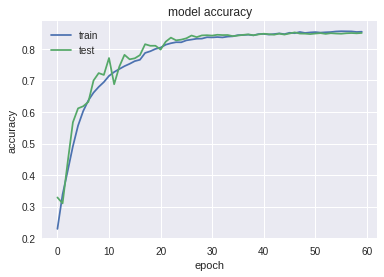

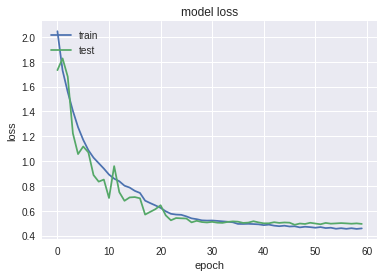

In [153]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

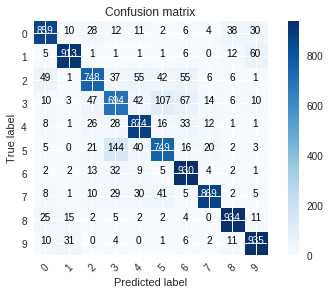

In [154]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))